<a href="https://colab.research.google.com/github/Kozzlov/cnn_tf_classification_10categories/blob/main/cnn_10classes_optimized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [76]:
#downloading CIFAR10 dataset = 10 categories
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
#normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
#verify the data
class_names = ['airplane',
               'automobile',
               'bird', 'cat', 
               'deer', 'dog',
               'frog', 'horse',
               'ship', 'truck']
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_images[i], cmap=plt.cm.binary)
#     # The CIFAR labels happen to be arrays, 
#     # which is why you need the extra index
#     plt.xlabel(class_names[train_labels[i][0]])
# plt.show()

In [109]:
#create a convolution base 
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_121 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_66 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_123 (Conv2D)          (None, 4, 4, 64)        

In [110]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(train_images,
                    train_labels, 
                    epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7808 - accuracy: 0.3398 - val_loss: 1.2452 - val_accuracy: 0.5583
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2454 - accuracy: 0.5574 - val_loss: 1.1040 - val_accuracy: 0.6111
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0937 - accuracy: 0.6130 - val_loss: 0.9720 - val_accuracy: 0.6563
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9788 - accuracy: 0.6559 - val_loss: 0.9459 - val_accuracy: 0.6683
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9151 - accuracy: 0.6792 - val_loss: 0.9176 - val_accuracy: 0.6812
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8687 - accuracy: 0.6932 - val_loss: 0.8561 - val_accuracy: 0.7002
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8279 - accuracy: 0.7074 - val_loss: 0.8431 - val_accuracy:

313/313 - 1s - loss: 0.7786 - accuracy: 0.7382
0.7382000088691711


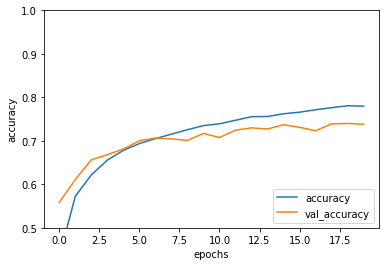

In [111]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print(test_acc)